# Protein Synthesis Simulation

Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ID                                           sequence category
0  NM_001368254.1  GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...       NM
1  NM_001350977.1  TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...       NM

### Simulation

In [2]:
from src.simulation import ProteinSinthesisProcess

In [3]:
import random
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Simulation parameters
SIM_TIME = 3600*24 # 24 hours
NUMBER_RESOURCES = 1e+6
NUMBER_RNA_POLYMERASES = 200
NUMBER_RIBOSOMES = 50
NUMBER_RNA_TRANSFER = 500
URACIL_INITIAL_AMOUNT = random.randint(8e+4, 1e+5)
ADENINE_INITIAL_AMOUNT = random.randint(8e+4, 1e+5)
GUANINE_INITIAL_AMOUNT = random.randint(8e+4, 1e+5)
CYTOSINE_INITIAL_AMOUNT = random.randint(8e+4, 1e+5)

In [4]:
protein_synthesis_process = ProteinSinthesisProcess(
    dna_sequences_df=data_df,
    number_resources=NUMBER_RESOURCES,
    number_rna_polymerases=NUMBER_RNA_POLYMERASES, 
    number_ribosomes=NUMBER_RIBOSOMES,
    number_rna_transfers_per_codon=NUMBER_RNA_TRANSFER,
    uracil_initial_amount=URACIL_INITIAL_AMOUNT,
    adenine_initial_amount=ADENINE_INITIAL_AMOUNT,
    guanine_initial_amount=GUANINE_INITIAL_AMOUNT,
    cytosine_initial_amount=CYTOSINE_INITIAL_AMOUNT,
    random_seed=RANDOM_SEED,
    verbose=True
    )

In [ ]:
print(protein_synthesis_process)

Protein Sinthesis Process:
185310 dna sequences to synthesize,
1000000.0 resources available,
200 RNA polymerases,
50 ribosomes,
43648 uracil bases,
40819 adenine bases,
44506 guanine bases,
44012 cytosine bases.


In [ ]:
print(repr(protein_synthesis_process))

Protein Sinthesis Process:
185310 dna sequences to synthesize,
1000000.0 resources available,
200 RNA polymerases,
50 ribosomes,
43648 uracil bases,
40819 adenine bases,
44506 guanine bases,
44012 cytosine bases,
531 transfer RNA for UUU codon,
464 transfer RNA for UCU codon,
453 transfer RNA for UAU codon,
544 transfer RNA for UGU codon,
485 transfer RNA for UUC codon,
481 transfer RNA for UCC codon,
478 transfer RNA for UAC codon,
467 transfer RNA for UGC codon,
544 transfer RNA for UUA codon,
463 transfer RNA for UCA codon,
536 transfer RNA for UAA codon,
544 transfer RNA for UGA codon,
519 transfer RNA for UUG codon,
461 transfer RNA for UCG codon,
525 transfer RNA for UAG codon,
504 transfer RNA for UGG codon,
454 transfer RNA for CUU codon,
453 transfer RNA for CCU codon,
461 transfer RNA for CAU codon,
477 transfer RNA for CGU codon,
479 transfer RNA for CUC codon,
514 transfer RNA for CCC codon,
527 transfer RNA for CAC codon,
453 transfer RNA for CGC codon,
521 transfer RNA fo

Start simulation:

In [ ]:
protein_synthesis_process.run(simulation_time=SIM_TIME) # run the simulation

Simulation started
Time 0.0000: DNA Sequence 0 requesting to start synthesis
Time 0.0000: DNA Sequence 0 synthesize started
Time 0.0000: DNA Sequence 0 start transcription process
Time 0.0000: DNA Sequence 0 contains 6 promoters
Time 0.0000: DNA Sequence 0 (mRNA sequence 0) start transcription process
Time 1.1133: DNA Sequence 1 requesting to start synthesis
Time 1.1133: DNA Sequence 1 synthesize started
Time 1.1133: DNA Sequence 1 start transcription process
Time 1.1133: DNA Sequence 1 contains 4 promoters
Time 1.1133: DNA Sequence 1 (mRNA sequence 0) start transcription process
Time 1.6342: DNA Sequence 2 requesting to start synthesis
Time 1.6342: DNA Sequence 2 synthesize started
Time 1.6342: DNA Sequence 2 start transcription process
Time 1.6342: DNA Sequence 2 contains 0 promoters
Time 1.6342: DNA Sequence 2 synthetis ended
Time 7.9433: DNA Sequence 1 start translation process
Time 7.9433: DNA Sequence 1 (mRNA sequence 0) start translation process
Time 8.6731: DNA Sequence 3 reque

In [ ]:
TEST_NAME='test'
protein_synthesis_process.save_process(folder_test_name=TEST_NAME) # save the process

Process saved.


### Results

In [ ]:
import pandas as pd
TEST_NAME='test'
results_path = 'results/'+TEST_NAME+'/results.csv'

results_df = pd.read_csv(results_path, index_col=0)

In [ ]:
print('Number of DNA sequence traslated:', results_df[results_df['mrna_sequences'].notna()].shape[0])
print('Number of DNA sequence not traslated:', results_df[results_df['protein_synthesized']==False].shape[0])

Number of DNA sequence traslated: 184
Number of DNA sequence not traslated: 1116


In [ ]:
results_df[results_df['mrna_sequences'].notna()][[
    'polypeptides_chains', 'number_of_proteins_synthesized', 'number_of_proteins_synthesized_per_mrna', 
    'length_proteins', 'number_different_proteins']].head()

polypeptides_chains  \
790   ['NH2-RPDDDRRPESDEPRRDETTPGALRGERPSLGPGPNPQGRR...   
1186                            ['NH2-TLNFWLSHNL-COOH']   
3750                                ['NH2-TFIEMK-COOH']   
3998                             ['NH2-KCFKNLIGK-COOH']   
4407                       ['NH2-FTYQLRLYINKSIYN-COOH']   

      number_of_proteins_synthesized number_of_proteins_synthesized_per_mrna  \
790                               20                               [7, 6, 7]   
1186                               3                                     [3]   
3750                               7                                     [7]   
3998                               8                                     [8]   
4407                               2                                     [2]   

     length_proteins  number_different_proteins  
790          [87, 9]                        2.0  
1186            [10]                        1.0  
3750             [6]                        1.0  
3998             [9]                        1.0  
4407            [15]                        1.0

In [ ]:
results_df[results_df['mrna_sequences'].notna()][
    ['request_start_process_time', 'start_process_time', 'end_process_time',
    'number_different_proteins', 'number_of_proteins_synthesized']
    ].describe()

request_start_process_time  start_process_time  end_process_time  \
count                  184.000000          184.000000        184.000000   
mean                   683.276365          683.276365       1255.661703   
std                    524.867809          524.867809        967.165382   
min                      1.113300            1.113300         85.360700   
25%                    239.792700          239.792700        528.737750   
50%                    575.544050          575.544050       1028.277750   
75%                   1005.723725         1005.723725       1766.499550   
max                   2128.591100         2128.591100       5688.529300   

       number_different_proteins  number_of_proteins_synthesized  
count                 184.000000                      184.000000  
mean                    1.559783                       12.565217  
std                     1.119481                       11.977031  
min                     0.000000                        1.000000  
25%                     1.000000                        4.000000  
50%                     1.000000                        8.000000  
75%                     2.000000                       18.000000  
max                     7.000000                       74.000000

### Protein Length

In [ ]:
from src.utils.plot_utils import *

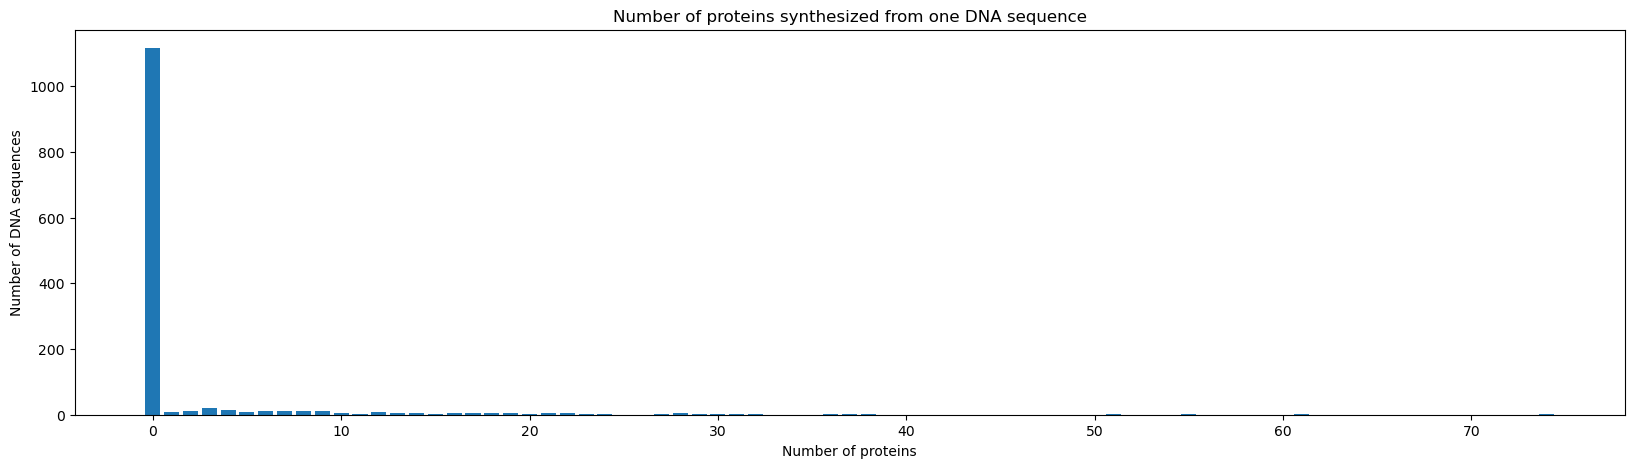

In [ ]:
barplot_proteins_number(results_df)

In [ ]:
plot_proteins_number_over_time(results_df)

In [ ]:
plot_cumulative_proteins_number_over_time(results_df)

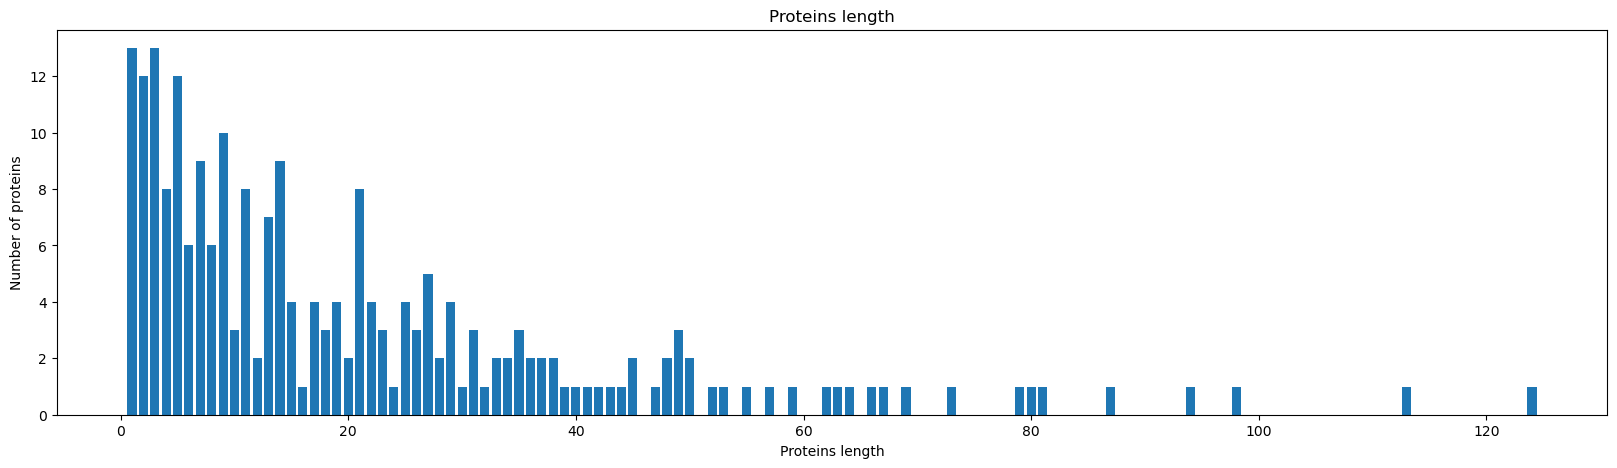

In [ ]:
barplot_proteins_length(results_df)

In [ ]:
plot_number_proteins_per_length_mrna(results_df)

In [ ]:
barplot_number_proteins_per_mrna(results_df)

### Process time

Whole process:

In [ ]:
hist_process_time(results_df)

In [ ]:
plot_process_time(results_df)

mRNA lifetime:

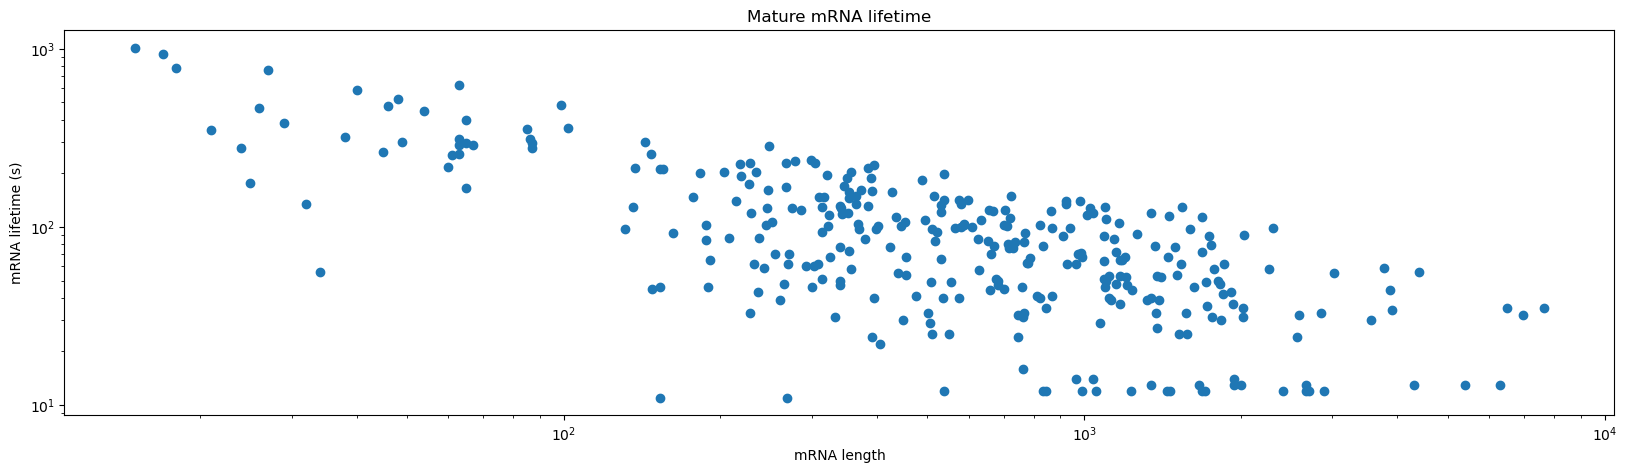

In [ ]:
plot_mrna_lifetime(results_df)

### Nucleotides Level

In [ ]:
import json

with open('results/test/nucleotides/nucleotides_history_uracil.json') as f:
    uracil_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_adenine.json') as f:
    adenine_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_guanine.json') as f:
    guanine_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_cytosine.json') as f:
    cytosine_dict = json.load(f)

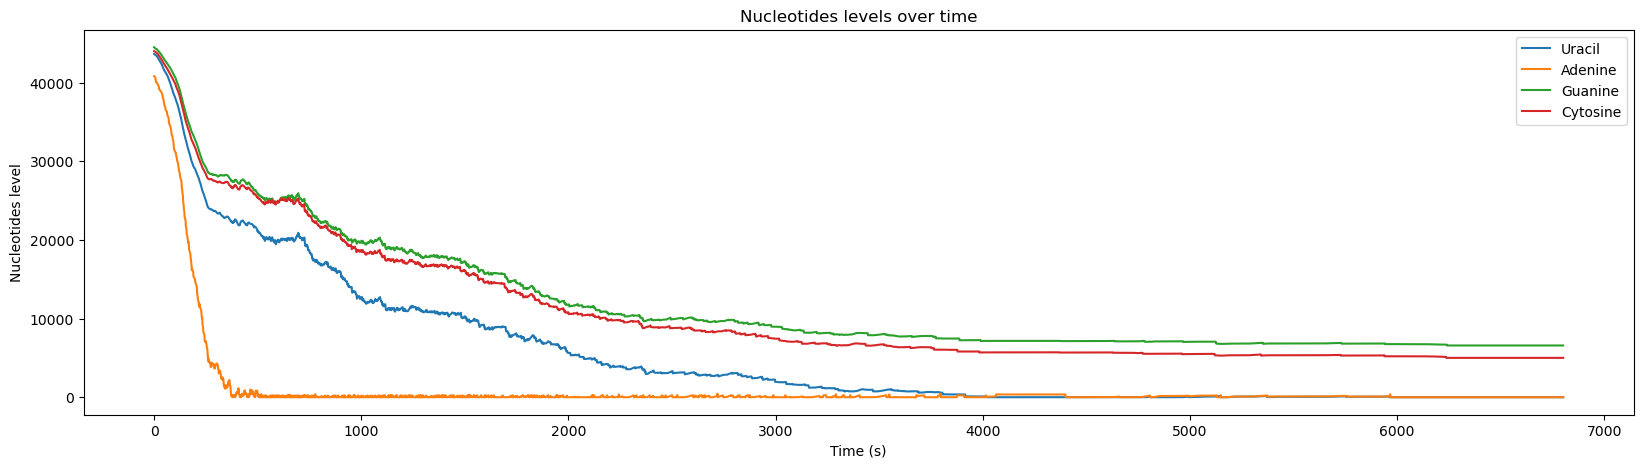

In [ ]:
plot_nucleotide_level_over_time(uracil_dict, adenine_dict, guanine_dict, cytosine_dict, time_unit=1)

### RNA Polymerase

In [ ]:
with open('results/'+TEST_NAME+'/rna_polymerase_history.json') as f:
    rna_polymerase_dict = json.load(f)

In [ ]:
rna_polymerase_df = dict_to_dataframe(rna_polymerase_dict)

In [ ]:
rna_polymerase_df.describe() # values in seconds

queue  request_time  available_time  wait_time     end_time  usage_time
count  486.0    486.000000      486.000000      486.0   486.000000  486.000000
mean     0.0    714.446498      714.446498        0.0  1141.171289   11.474957
std      0.0    391.106643      391.106643        0.0  1017.806215   44.837716
min      0.0      0.000000        0.000000        0.0     7.943300    0.007700
25%      0.0    395.998750      395.998750        0.0   414.708500    0.922600
50%      0.0    707.260700      707.260700        0.0   860.505950    2.526350
75%      0.0   1030.063250     1030.063250        0.0  1543.710700    5.166950
max      0.0   1434.915300     1434.915300        0.0  6469.884500  649.375500

### Ribosome

In [ ]:
with open('results/'+TEST_NAME+'/ribosome_history.json') as f:
    ribosome_dict = json.load(f)

In [ ]:
ribosome_df = dict_to_dataframe(ribosome_dict)

In [ ]:
ribosome_df.describe()

queue  request_time  available_time  wait_time     end_time  \
count  3235.0   3235.000000     3235.000000     3235.0  3235.000000   
mean      0.0   1296.410730     1296.410730        0.0  1308.295216   
std       0.0   1099.440825     1099.440825        0.0  1099.398032   
min       0.0      7.943300        7.943300        0.0    19.522300   
25%       0.0    538.826050      538.826050        0.0   550.696050   
50%       0.0    980.290000      980.290000        0.0   991.422000   
75%       0.0   1686.173400     1686.173400        0.0  1697.579600   
max       0.0   6613.003500     6613.003500        0.0  6624.098500   

        usage_time  
count  3235.000000  
mean      1.516123  
std       2.579735  
min       0.000400  
25%       0.232100  
50%       0.603700  
75%       1.389600  
max      13.944000

Resources request wait time:

In [ ]:
resources_request_wait_time(rna_polymerase_df, ribosome_df)

### Transfer RNA

In [ ]:
plot_codons_request(file_path='results/'+TEST_NAME+'/rna_transfer/', time_unit=1)

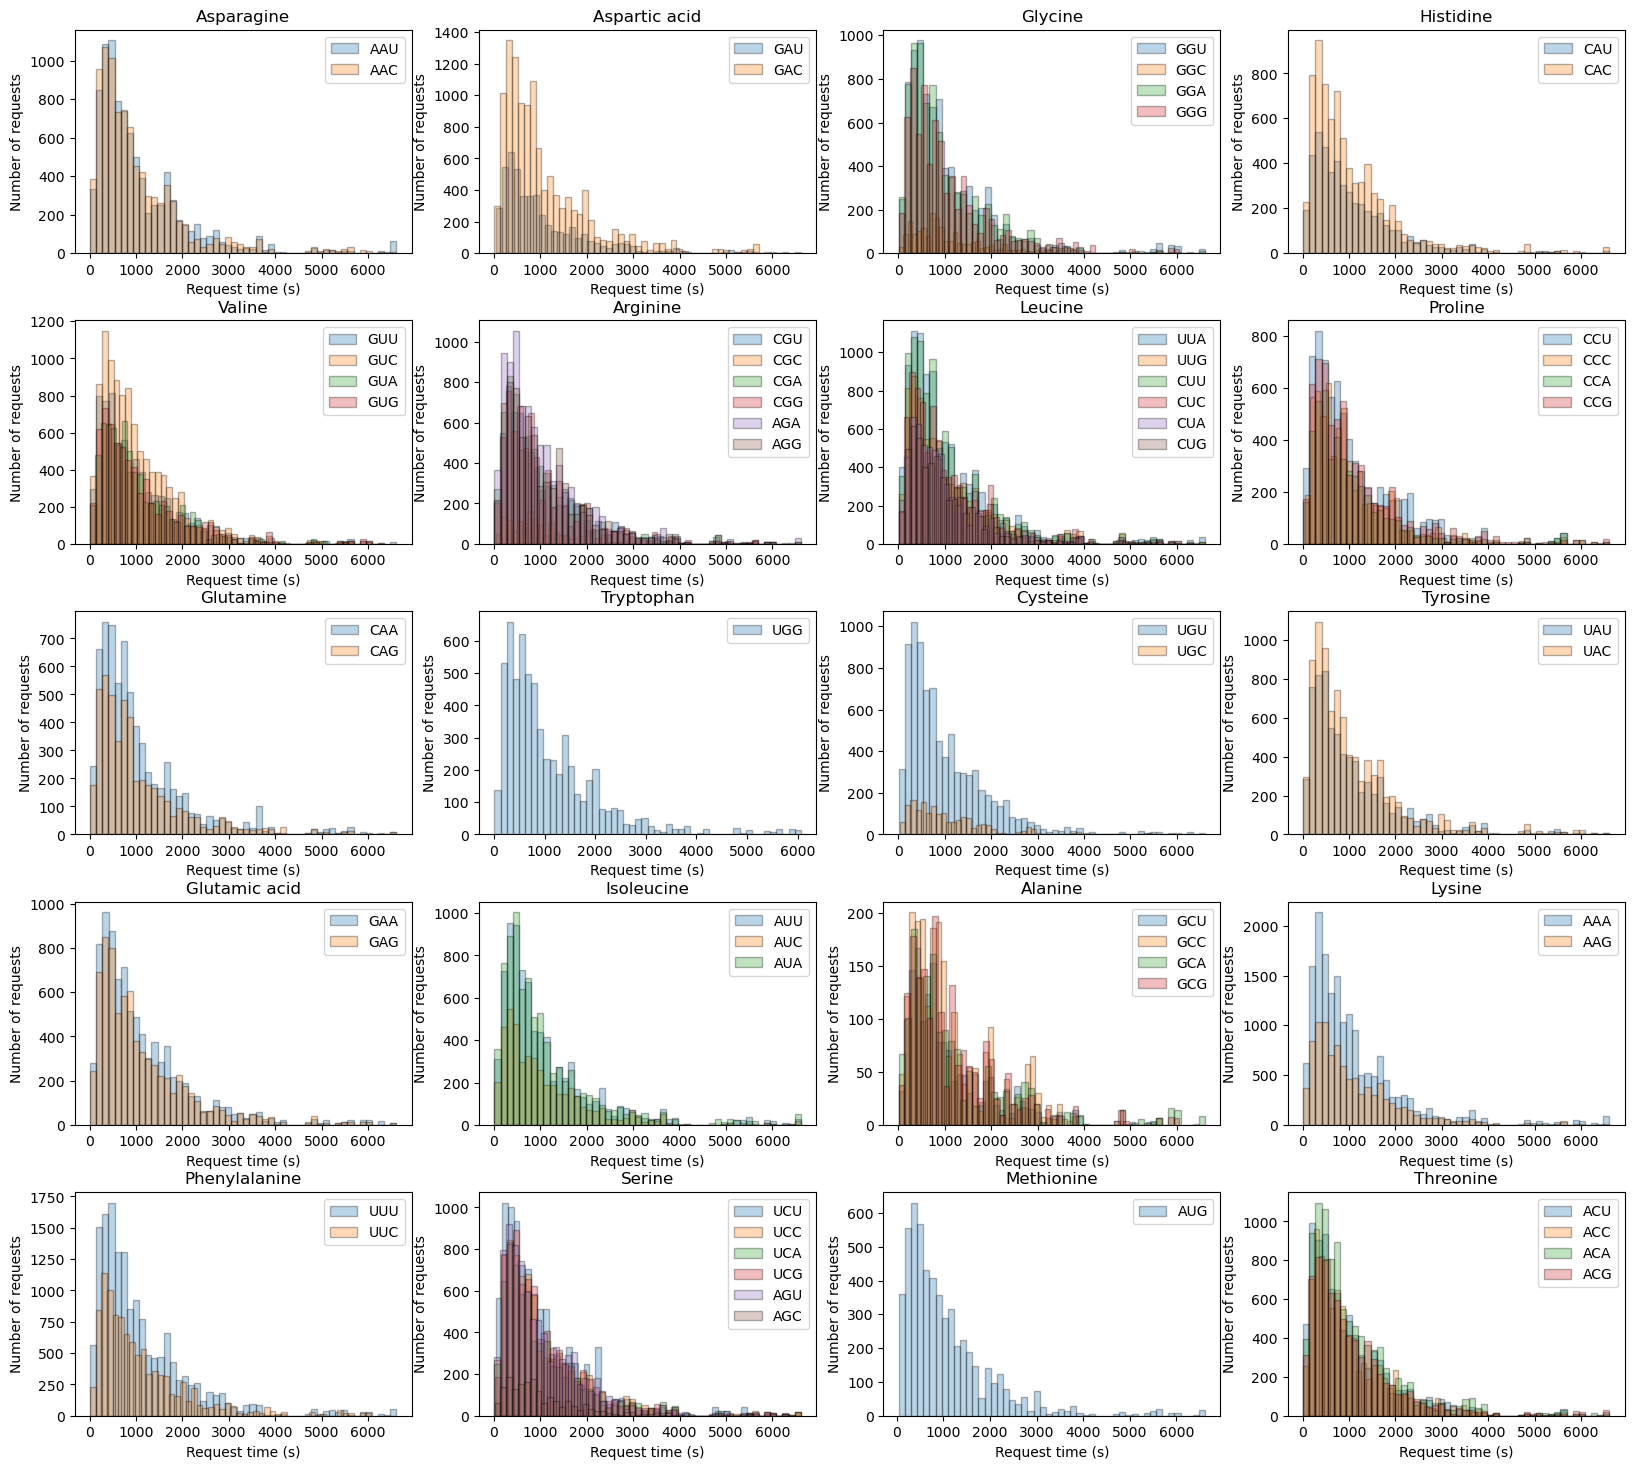

In [ ]:
plot_codons_request_per_aminoacid(file_path='results/'+TEST_NAME+'/rna_transfer/', time_unit=1)